In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)

import seaborn as sns
from datetime import datetime, timedelta

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy import stats
import statsmodels.api as sm
from itertools import product

import warnings
warnings.filterwarnings('ignore')

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('../doge_v1.csv', parse_dates=['Date'], index_col='Date', date_parser=dateparse)
df.head()


,Open,High,Low,Close,Adj Close,Volume,twitter_followers,reddit_average_posts_48h,reddit_average_comments_48h,reddit_subscribers,...,subscribers,total_issues,closed_issues,pull_requests_merged,pull_request_contributors,commit_count_4_weeks,dogecoin_unscaled,dogecoin_monthly,scale,dogecoin
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550,165257.000000,0.633,9.490,81680.0,...,225.0,395.000000,336.0,732.0,67.0,0.0,57,1.0,0.01,0.57
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,165308.000000,0.833,11.958,81723.0,...,225.0,395.166667,336.0,732.0,67.0,0.0,24,1.0,0.01,0.24
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,165363.000000,0.980,13.224,81772.0,...,225.0,395.333333,336.0,732.0,67.0,0.0,23,1.0,0.01,0.23
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,165402.000000,1.102,14.469,81831.0,...,225.0,395.500000,336.0,732.0,67.0,0.0,23,1.0,0.01,0.23
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,165452.666667,1.277,15.383,81878.0,...,225.0,395.666667,336.0,732.0,67.0,0.0,41,1.0,0.01,0.41


In [5]:
pd.date_range(start = '2017-11-09', end = '2022-02-04' ).difference(df.index)


DatetimeIndex(['2021-04-16', '2021-05-05', '2021-05-09'], dtype='datetime64[ns]', freq=None)

In [6]:
doge_month = df.resample('M').mean()

Dickey–Fuller test: p=0.414540


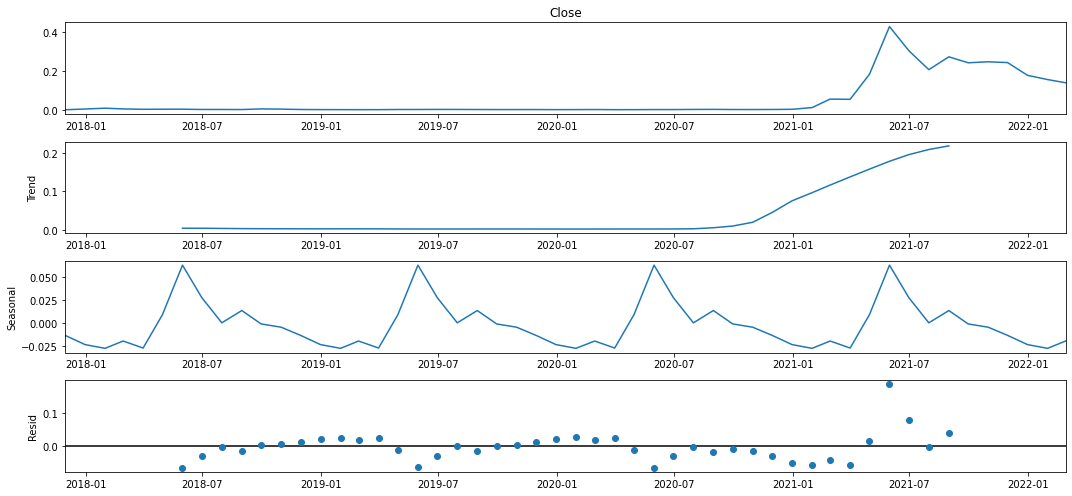

In [9]:
seasonal_decompose(doge_month.Close).plot()
print("Dickey–Fuller test: p=%f" % adfuller(doge_month.Close)[1])
plt.show()


In [11]:
# Box-Cox transformacija
doge_month['close_box'], lmbda = stats.boxcox(doge_month.Close)
print("Dickey–Fuller test: p=%f" % adfuller(doge_month.close_box)[1])


Dickey–Fuller test: p=0.874060


In [12]:
doge_month['box_diff_seasonal_12'] = doge_month.close_box - doge_month.close_box.shift(12)
print("Dickey–Fuller test: p=%f" % adfuller(doge_month.box_diff_seasonal_12[12:])[1])

Dickey–Fuller test: p=0.564252


In [13]:
# Seasonal differentiation (3 months)
doge_month['box_diff_seasonal_3'] = doge_month.close_box - doge_month.close_box.shift(3)
print("Dickey–Fuller test: p=%f" % adfuller(doge_month.box_diff_seasonal_3[3:])[1])


Dickey–Fuller test: p=0.000475


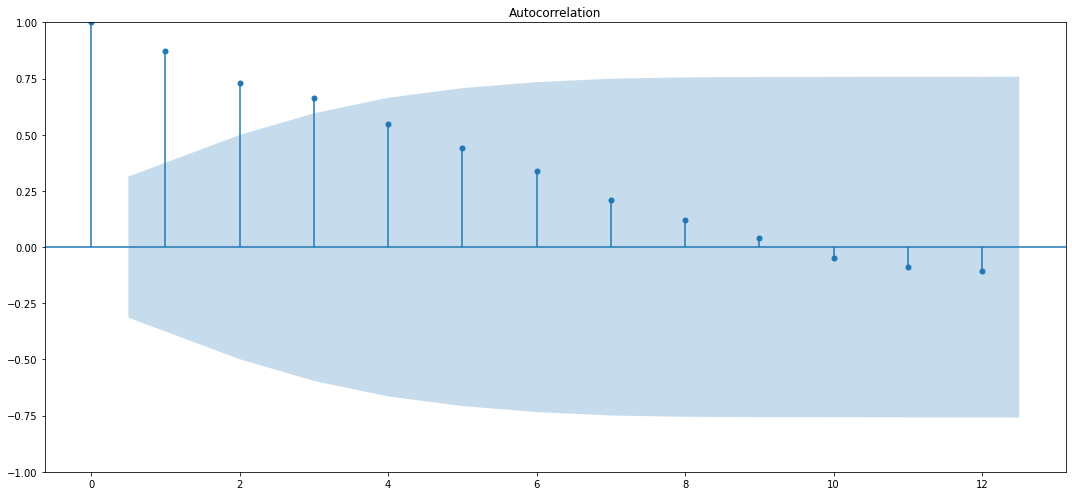

In [15]:
plot_acf(doge_month.Close[13:].values.squeeze(), lags=12)

plt.tight_layout()
plt.show()
